In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
import pandas as pd
import locale
import time
from ipywidgets import interact
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
myfont = FontProperties(fname=r'c:\windows\fonts\simsun.ttc', size=14)

In [2]:
path = ('http://datacenter.taichung.gov.tw/swagger/OpenData/d9cad116-1255-4e97-94fc-d8dc58cd9ff9')
df = pd.read_csv(path,index_col="區")#[NCTS]DavidChi
df.head()

,發生時間,事故類別,市,里,鄰,事故地點,鄰近,肇事逃逸,酒駕案件
區,,,,,,,,,
大雅區,10410010025,A2,臺中市,西寶里,NaN,雅潭路四段35號前,NaN,否,否
西屯區,10410010131,A3,臺中市,何福里,NaN,漢口路二段110之1號前,NaN,否,否
北屯區,10410010145,A2,臺中市,平和里,NaN,梅川西路四段與瀋陽路一段(口),NaN,否,否
西區,10410010213,A2,臺中市,公民里,NaN,自立街,與忠仁街,否,否
龍井區,10410010407,A3,臺中市,東海里,NaN,遊園北路382號前,NaN,是,否


In [3]:
df.index

Index(['大雅區', '西屯區', '北屯區', '西區', '龍井區', '大雅區', '豐原區', '霧峰區', '北區', '東區',
       ...
       '大里區', '神岡區', '大安區', '神岡區', '潭子區', '南區', '南屯區', '北屯區', '東區', '新社區'],
      dtype='object', name='區', length=8592)

In [4]:
df.isnull().any() 

發生時間    False
事故類別    False
市       False
里        True
鄰        True
事故地點    False
鄰近       True
肇事逃逸    False
酒駕案件    False
dtype: bool

In [5]:
df.drop(['市','里','鄰','鄰近'],axis=1,inplace=True)

In [18]:
df.head(10000)

,發生時間,事故類別,事故地點,肇事逃逸,酒駕案件
區,,,,,
大雅區,10410010025,A2,雅潭路四段35號前,否,否
西屯區,10410010131,A3,漢口路二段110之1號前,否,否
北屯區,10410010145,A2,梅川西路四段與瀋陽路一段(口),否,否
西區,10410010213,A2,自立街,否,否
龍井區,10410010407,A3,遊園北路382號前,是,否
大雅區,10410010606,A3,中山路與中山十二路(口),否,否
豐原區,10410010620,A2,圓環西路87巷71號前北側,否,是
霧峰區,10410010635,A2,中正路7號前,否,否
北區,10410010655,A2,永興街與梅亭街(口),否,否


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8592 entries, 大雅區 to 新社區
Data columns (total 5 columns):
發生時間    8592 non-null int64
事故類別    8592 non-null object
事故地點    8592 non-null object
肇事逃逸    8592 non-null object
酒駕案件    8592 non-null object
dtypes: int64(1), object(4)
memory usage: 402.8+ KB


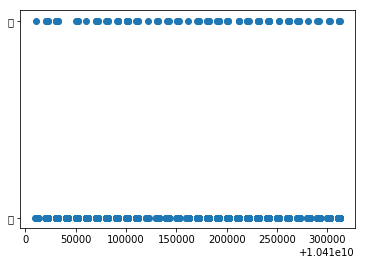

In [16]:
#X=x.reshape(len(x),1)
#Y=y.reshape(len(y),1)
X = np.array(df['發生時間'])
Y = np.array(df['酒駕案件'])
plt.scatter(X,Y)

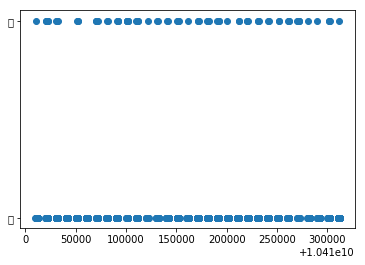

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 888)

plt.scatter(x_train,y_train)
#regr = LinearRegression()
#regr.fit(x_train,y_train) 
#y_predict = regr.predict(x_test)
#y_predict

#plt.plot(x_test,y_predict ,color='R',  linewidth=2, label="best line")
#plt.scatter(x_train,y_train)

#regr.score(x_test,y_test)

#plt.title('酒駕區域分佈',fontproperties=myfont) 
#plt.xlabel('區',fontproperties=myfont)  
#plt.ylabel('次數',fontproperties=myfont)
plt.show()